<div class='alert alert-success'>
    <h1 align="center">Local Search Algorithms: N-Queens Problem</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
import random
import matplotlib.pyplot as plt

import ipywidgets as widgets

plt.rcParams['figure.figsize'] = (6, 6)

## N-Queens Problem
- **Goal**: Place N queens on a N-by-N chess board so that no two queens can attack each other.
- Thus a solution requires that no two queens share the same row, column or diagonal.

<p align="center">
    <img src="imgs/Four-Queens-Local-Search.png" width="70%">
</p>
<h6 align="center">4-Queens problem</h6>![image.png](attachment:5cd8d9db-541a-4aa6-81fa-21e9a0730da8.png)

### Problem formulation: First formulation
- **States**: each column contains only one queen.
- **Actions**: move a queen to another row in its column.
- **State Space Size**: $N^N$


### Problem formulation: Second formulation (Permuatation)
- **States**: each column and each row contains only one queen.
- **Actions**: move a queen to another row in its column which is not occupied.
- **State Space Size**: $N!$

### Implementing N-Queens states based on second formulation

In [2]:
class NQueensState:
    '''N-Queens state based on permutation formulation'''
    
    def __init__(self, queens=None, N=8):
        ''' Constructor '''

        if queens:
            self.N = len(queens)
            self.queens = queens.copy()
        else:
            self.N = N
            self.queens = list(range(1, N + 1))

        self.num_conflicts = None    
        
    def __eq__(self, other):
        if self is other: return True
        if other is None: return False
        if not isinstance(other, NQueensState): return False
    
        return self.conflicts() == other.conflicts()
    
    def __ge__(self, other):
        if self is other: return True
        if other is None: return False
        if not isinstance(other, NQueensState): return False
    
        return self.conflicts() >= other.conflicts()        
        
    def conflicts(self):
        ''' Computes number of pairs og queens which are on the same diagonal'''

        if self.num_conflicts is None:
            self.num_conflicts = sum([abs(self.queens[j] - self.queens[i]) == j - i
                                      for i in range(self.N - 1)
                                      for j in range(i + 1, self.N)])

        return self.num_conflicts
                            
    def neighbors(self):
        ''' Create all successors by considering every pair and swaping their position'''

        N = self.N
        
        for i in range(N - 1):
            for j in range(i + 1, N):
                neighbor = NQueensState(queens=self.queens)
                neighbor.queens[i], neighbor.queens[j] = neighbor.queens[j], neighbor.queens[i]
                yield neighbor
    
    def best_neighbor(self):
        ''' find a neighbor with minimum number of conflicts'''

        min_conflicts = self.N * (self.N - 1) // 2
        best = None
        for neighbor in self.neighbors():
            if neighbor.conflicts() < min_conflicts:
                min_conflicts, best = neighbor.conflicts(), neighbor
        return best

        #         return min(self.neighbors(), key=lambda x: x.conflicts())
    
    def random_neighbor(self):
        ''' find a random neighbor by swaping two randomly selected queens'''

        i = random.randint(0, self.N - 2)
        j = random.randint(i + 1, self.N - 1)
        neighbor = NQueensState(queens=self.queens)
        neighbor.queens[i], neighbor.queens[j] = neighbor.queens[j], neighbor.queens[i]
        return neighbor
    
    @staticmethod
    def random_state(N=8):
        queens = list(range(1, N + 1))
        random.shuffle(queens)
        return NQueensState(queens=queens)

    def plot(self, width=512, height=512, show_conflicts=False, fc='darkslateblue'):
        N = self.N

        w, h = width // N, height // N

        border = plt.Rectangle((0, 0), N * w, N * h, ec=fc, fc='w', alpha=0.35)
        plt.gca().add_patch(border)

        # draw chess board
        for i in range(N):
            for j in range(N):
                alpha = 0.35 if (i + j) % 2 == 0 else 0.1
                cell = plt.Rectangle((i * w, j * h), w, h, fc=fc, alpha=alpha)
                plt.gca().add_patch(cell)

                    
        
        # show conflicts
        if show_conflicts:
            for i in range(N - 1):
                row_i = self.queens[i]
                for j in range(i + 1, N):
                    row_j = self.queens[j]
                    if row_i == row_j or abs(row_i - row_j) == j - i:
                        x1, x2 = i * w + w // 2, j * w + w // 2
                        y1, y2 = (row_i - 1) * h + h // 2, (row_j - 1) * h + h // 2
                        line = plt.Line2D((x1, x2), (y1, y2), lw=3, ls='-', color='orchid', alpha=0.6)
                        plt.gca().add_line(line)

        # place queens on chess board
        for col, row in enumerate(self.queens):
            c = 'k' if (col + row) % 2 == 0 else 'w'
            x = col * w + w // 2
            y = (row - 1) * h + h // 2
            fs = w // 2
            plt.text(x, y, '♛', color='k', fontsize=fs, ha='center', va='center')

        plt.axis('square')
        plt.axis('off')
        plt.title("Conflicts = {}".format(self.conflicts()), fontsize=18)
        plt.show()    
        
    def __str__(self):
        return f'{self.queens} <{self.conflicts()}>'
    
    def __repr__(self):
        return f'NQueensState(queens={self.queens})'

In [3]:
state = NQueensState.random_state()
print(state)

[4, 7, 5, 8, 3, 1, 2, 6] <4>


In [4]:
state = NQueensState.random_state(N=8)
print(state)

[4, 5, 2, 1, 6, 3, 7, 8] <6>


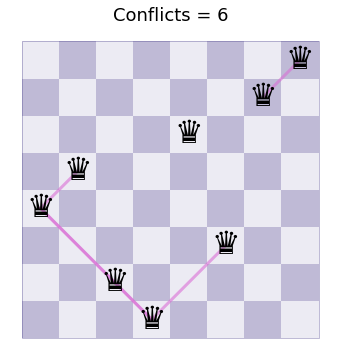

In [5]:
state.plot(show_conflicts=True)

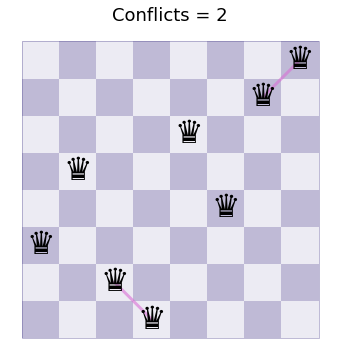

In [6]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [7]:
best_neighbor

NQueensState(queens=[3, 5, 2, 1, 6, 4, 7, 8])